In [68]:
# import relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

import matplotlib.transforms as mtransforms
from matplotlib.patches import FancyBboxPatch

In [2]:
df = pd.read_csv('./data/EPL 19-20 player statistics.csv')
pd.set_option('display.max_columns', None)
df

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

In [3]:
# Filter for players who have played at least 1000 minutes
mask = (df.mins_played > 900) 
df = df.loc[mask]
df

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

In [4]:
df['nineties'] = df['mins_played'] / 90
df['xg_p90'] = df['expected_goals_nonpenalty'] / df['nineties']
df['xa_p90'] = df['expected_assists'] / df['nineties']

In [5]:
df

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

In [6]:
df.xg_p90.mean()

0.12192946730501981

In [7]:
fwd = (df.position == 'Midfielder') | (df.position == 'Forward')
fwd = df.loc[fwd]

In [8]:
fwd.xg_p90.mean()

0.19238225765049272

In [9]:
# create a new column in the data to get goal involement per 90 and sort by rows in order of this column
df['gi_p90'] = df['xa_p90'] + df['xg_p90']
df = df.sort_values('gi_p90', ascending = False)

In [10]:
arsenal = (df.team == 'Arsenal') & ((df.position != 'Goalkeeper') & (df.position != 'Defender')) & (df.gi_p90 > 0.152)
arsenal = df.loc[arsenal]

In [11]:
arsenal

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

In [12]:
xGI = (df.team != 'Arsenal')
xGI = df.loc[xGI]

In [13]:
xGI = xGI[:30]
xGI

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

In [14]:
# top_xg = df.loc[df.xg_p90 > 0.50][0:10]
# top_xg

In [15]:
top_xa = df.loc[df.xa_p90 > 0.19][0:28]
top_xa

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

In [16]:
mid = (df.position == 'Midfielder') | (df.position == 'Forward')
mid = df.loc[mid]

In [17]:
fwd = (df.position == 'Forward')
fwd = df.loc[fwd]

In [18]:
fwd.xg_p90.mean()

0.35024728155060725

In [19]:
mid.xa_p90.mean()

0.10757249890088992

In [20]:
arsenal

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

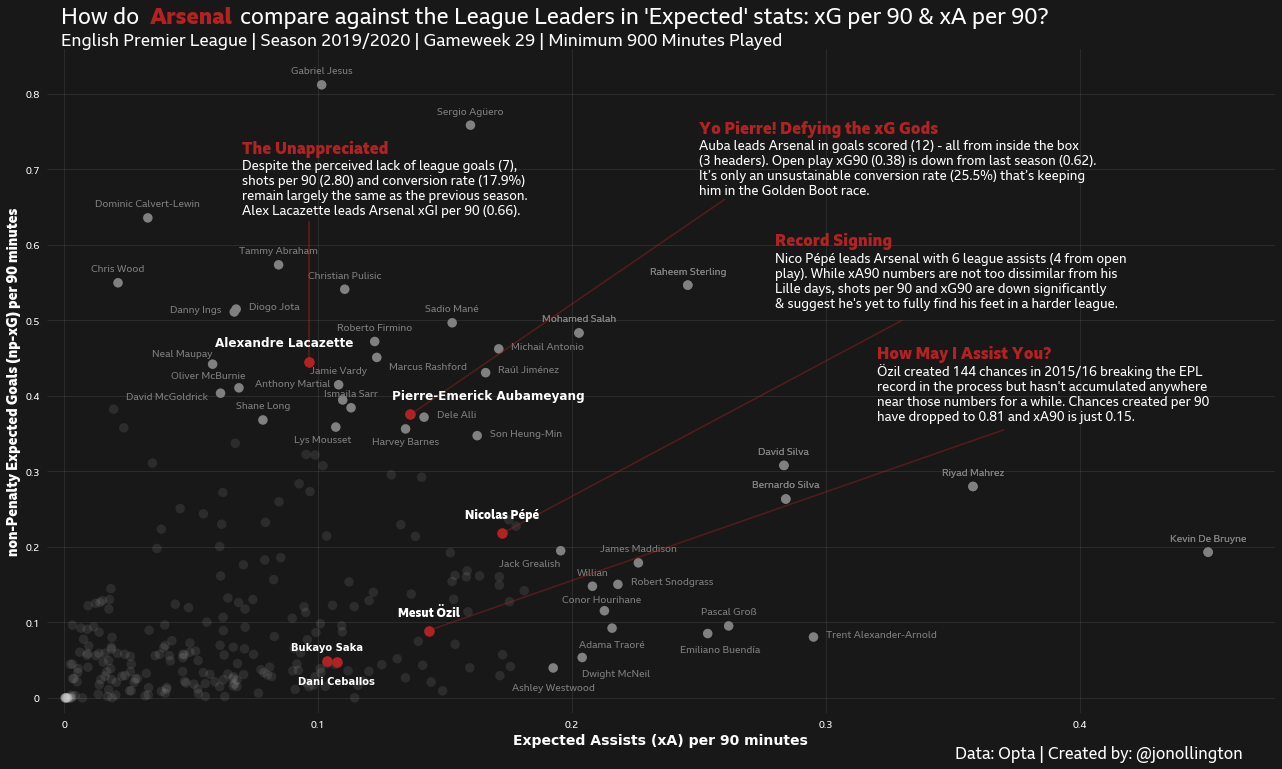

In [24]:
fig, ax = plt.subplots(figsize=(18,10))

csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}




#set and place ticks on main viz
xt = [0,0.1,0.2,0.3,0.4,0.5]
yt = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.set_xlim(-0.007,0.477)
ax.set_ylim(-0.02,0.86)
ax.set_xticklabels(xt,color="white", **csfont)
ax.set_yticklabels(yt,color="white", **csfont)

ax.set_ylabel("non-Penalty Expected Goals (np-xG) per 90 minutes",fontsize=14,fontweight="bold",color="white", **csfont)
ax.set_xlabel("Expected Assists (xA) per 90 minutes",fontsize=14,fontweight="bold",color="white")

bg = "#181818"

plt.box(False)             #add this line
plt.tick_params(color=bg)

#set figure background colour
fig.set_facecolor(bg)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#add gridlines to main viz
ax.grid(zorder=1,color="white",alpha=0.1)

# Arsenal plot
ax.scatter(df['xa_p90'], df['xg_p90'], s=90, facecolors='#E3E3E3', edgecolors="none", zorder=2, alpha=0.1)
ax.scatter(arsenal['xa_p90'], arsenal['xg_p90'], s=90, facecolors='firebrick', edgecolors='firebrick', zorder=3)
dx, dy = arsenal.xa_p90.values, arsenal.xg_p90.values
for i in range(len(arsenal)):
    if arsenal.player.iloc[i] == "Bukayo Saka":
        ax.text(dx[i],dy[i]+0.015,arsenal.player.iloc[i],ha="center",color="white",zorder=6,fontweight="bold")
    elif arsenal.player.iloc[i] == "Dani Ceballos":
        ax.text(dx[i],dy[i]-0.03,arsenal.player.iloc[i],ha="center",color="white",zorder=6,fontweight="bold")
    elif arsenal.player.iloc[i] == "Alexandre Lacazette":
        ax.text(dx[i]-0.01,dy[i]+0.020,arsenal.player.iloc[i],ha="center",color="white",zorder=6,fontweight="bold", fontsize=12)
    elif arsenal.player.iloc[i] == "Pierre-Emerick Aubameyang":
        ax.text(dx[i]+0.031,dy[i]+0.020,arsenal.player.iloc[i],ha="center",color="white",zorder=6,fontweight="bold", fontsize=12)
    else:
        ax.text(dx[i],dy[i]+0.020,arsenal.player.iloc[i],ha="center",color="white",zorder=6, fontweight="bold", 
            **csfont, fontsize=12)

# xGI plot
ax.scatter(xGI['xa_p90'], xGI['xg_p90'], s=90, facecolors='grey', edgecolors='none', zorder=3)
dx, dy = xGI.xa_p90.values, xGI.xg_p90.values
for i in range(len(xGI)):
    if xGI.player.iloc[i] == "Danny Ings":
        ax.text(dx[i]-0.005,dy[i],xGI.player.iloc[i],ha="right",color="grey",zorder=5, **csfont)
    elif xGI.player.iloc[i] == "Diogo Jota":
        ax.text(dx[i]+0.005,dy[i], xGI.player.iloc[i], ha='left', color='grey', zorder=5, **csfont)
    elif xGI.player.iloc[i] == "Marcus Rashford":
        ax.text(dx[i]+0.005,dy[i]-0.015, xGI.player.iloc[i], ha='left', color='grey', zorder=5, **csfont)
    elif xGI.player.iloc[i] == "Raúl Jiménez":
        ax.text(dx[i]+0.005,dy[i], xGI.player.iloc[i], ha='left', color='grey', zorder=5, **csfont)
    elif xGI.player.iloc[i] == "Michail Antonio":
        ax.text(dx[i]+0.005,dy[i]-0.001, xGI.player.iloc[i], ha='left', color='grey', zorder=5, **csfont)
    elif xGI.player.iloc[i] == "Son Heung-Min":
        ax.text(dx[i]+0.005,dy[i]-0.001, xGI.player.iloc[i], ha='left', color='grey', zorder=5, **csfont)
    elif xGI.player.iloc[i] == "Lys Mousset":
        ax.text(dx[i]-0.005,dy[i]-0.02, xGI.player.iloc[i], ha="center", color='grey', zorder=5, **csfont)
    elif xGI.player.iloc[i] == "Harvey Barnes":
        ax.text(dx[i],dy[i]-0.02, xGI.player.iloc[i], ha="center", color='grey', zorder=5, **csfont)
    elif xGI.player.iloc[i] == "Dele Alli":
        ax.text(dx[i]+0.005,dy[i], xGI.player.iloc[i], ha="left", color='grey', zorder=5, **csfont)
    elif xGI.player.iloc[i] == "Oliver McBurnie":
        ax.text(dx[i]+0.01,dy[i]+0.02, xGI.player.iloc[i], ha="right", color='grey', zorder=5, **csfont)
    elif xGI.player.iloc[i] == "David McGoldrick":
        ax.text(dx[i]-0.012,dy[i]-0.015, xGI.player.iloc[i], ha="right", color='grey', zorder=5, **csfont)
    elif xGI.player.iloc[i] == "Anthony Martial":
        ax.text(dx[i]-0.005,dy[i]+0.018, xGI.player.iloc[i], ha="right", color='grey', zorder=5, **csfont)
    elif xGI.player.iloc[i] == "Neal Maupay":
        ax.text(dx[i],dy[i]+0.01, xGI.player.iloc[i], ha="right", color='grey', zorder=5, **csfont)
    else:
        ax.text(dx[i],dy[i]+0.015,xGI.player.iloc[i],ha="center",color="grey",zorder=5, **csfont)

# xA plot
ax.scatter(top_xa['xa_p90'], top_xa['xg_p90'], s=90, facecolors='grey', edgecolors='none', zorder=3, )
dx, dy = top_xa.xa_p90.values, top_xa.xg_p90.values
for i in range(len(top_xa)):
    if top_xa.player.iloc[i] == "Trent Alexander-Arnold":
        ax.text(dx[i]+0.005,dy[i],top_xa.player.iloc[i],ha="left",color="grey",zorder=5, **csfont)
    elif top_xa.player.iloc[i] == "Emiliano Buendía":
        ax.text(dx[i]+0.005,dy[i]-0.025,top_xa.player.iloc[i],ha="center",color="grey",zorder=5, **csfont)
    elif top_xa.player.iloc[i] == "Robert Snodgrass":
        ax.text(dx[i]+0.005,dy[i],top_xa.player.iloc[i],ha="left",color="grey",zorder=5, **csfont)
    elif top_xa.player.iloc[i] == "Adama Traoré":
        ax.text(dx[i],dy[i]-0.025,top_xa.player.iloc[i],ha="center",color="grey",zorder=5, **csfont)
    elif top_xa.player.iloc[i] == "Jack Grealish":
        ax.text(dx[i],dy[i]-0.02,top_xa.player.iloc[i],ha="right",color="grey",zorder=5, **csfont)
    elif top_xa.player.iloc[i] == "Ashley Westwood":
        ax.text(dx[i],dy[i]-0.03,top_xa.player.iloc[i],ha="center",color="grey",zorder=5, **csfont)
    elif top_xa.player.iloc[i] == "Dwight McNeil":
        ax.text(dx[i],dy[i]-0.025,top_xa.player.iloc[i],ha="left",color="grey",zorder=5, **csfont)
    elif top_xa.player.iloc[i] == "Conor Hourihane":
        ax.text(dx[i]-0.001,dy[i]+0.011,top_xa.player.iloc[i],ha="center",color="grey",zorder=5, **csfont)
    else:
        ax.text(dx[i],dy[i]+0.015,top_xa.player.iloc[i],ha="center",color="grey",zorder=5, **csfont)

ax.text(0.28,0.6,"Record Signing",color="firebrick",fontweight="bold",fontsize=16,zorder=7, ha="left", **csfont)
ax.text(0.28,0.517,"Nico Pépé leads Arsenal with 6 league assists (4 from open\nplay). While xA90 numbers are not too dissimilar from his \nLille days, shots per 90 and xG90 are down significantly\n& suggest he's yet to fully find his feet in a harder league.",color="white",fontsize=13,zorder=7, ha="left", **csfont)

ax.text(0.32,0.45,"How May I Assist You?",color="firebrick",fontweight="bold",fontsize=16,zorder=7, ha="left", **csfont)
ax.text(0.32,0.368,"Özil created 144 chances in 2015/16 breaking the EPL\nrecord in the process but hasn't accumulated anywhere\nnear those numbers for a while. Chances created per 90\nhave dropped to 0.81 and xA90 is just 0.15.",color="white",fontsize=13,zorder=7, ha="left", **csfont)

ax.text(0.25,0.748,"Yo Pierre! Defying the xG Gods",color="firebrick",fontweight="bold",fontsize=16,zorder=7, ha="left", **csfont)
ax.text(0.25,0.667,"Auba leads Arsenal in goals scored (12) - all from inside the box\n(3 headers). Open play xG90 (0.38) is down from last season (0.62).\nIt’s only an unsustainable conversion rate (25.5%) that’s keeping\nhim in the Golden Boot race.",color="white",fontsize=13,zorder=7, ha="left", **csfont)

ax.text(0.07,0.721,"The Unappreciated",color="firebrick",fontweight="bold",fontsize=16,zorder=7, ha="left", **csfont)
ax.text(0.07,0.64,"Despite the perceived lack of league goals (7),\nshots per 90 (2.80) and conversion rate (17.9%)\nremain largely the same as the previous season.\nAlex Lacazette leads Arsenal xGI per 90 (0.66).",color="white",fontsize=13,zorder=7, ha="left", **csfont)

ax.plot([0.0965,0.0965],
         [0.44,0.63],color="firebrick",zorder=6, alpha=0.5)

ax.plot([0.138,0.26],
         [0.379,0.66],color="firebrick",zorder=6, alpha=0.4)


ax.plot([0.172,0.33],
         [0.217,0.50],color="firebrick",zorder=6, alpha=0.4)

ax.plot([0.145,0.37],
         [0.091,0.355],color="firebrick",zorder=6, alpha=0.4)

fig.text(0.05,1.02,"How do",color="white",fontsize=22, **csfont)
fig.text(0.118,1.02,"Arsenal",color="firebrick",fontsize=22,fontweight="bold", **csfont)
fig.text(0.188,1.02,"compare against the League Leaders in 'Expected' stats: xG per 90 & xA per 90?",color="white",fontsize=22, **csfont)
fig.text(0.05,0.99,"English Premier League | Season 2019/2020 | Gameweek 29 | Minimum 900 Minutes Played", color="white",fontsize=17, **csfont)
fig.text(0.74,0,"Data: Opta | Created by: @jonollington", color="white",fontsize=16, **csfont)

plt.tight_layout()
plt.savefig("Arsenal_xgi",facecolor=bg,bbox_inches="tight");

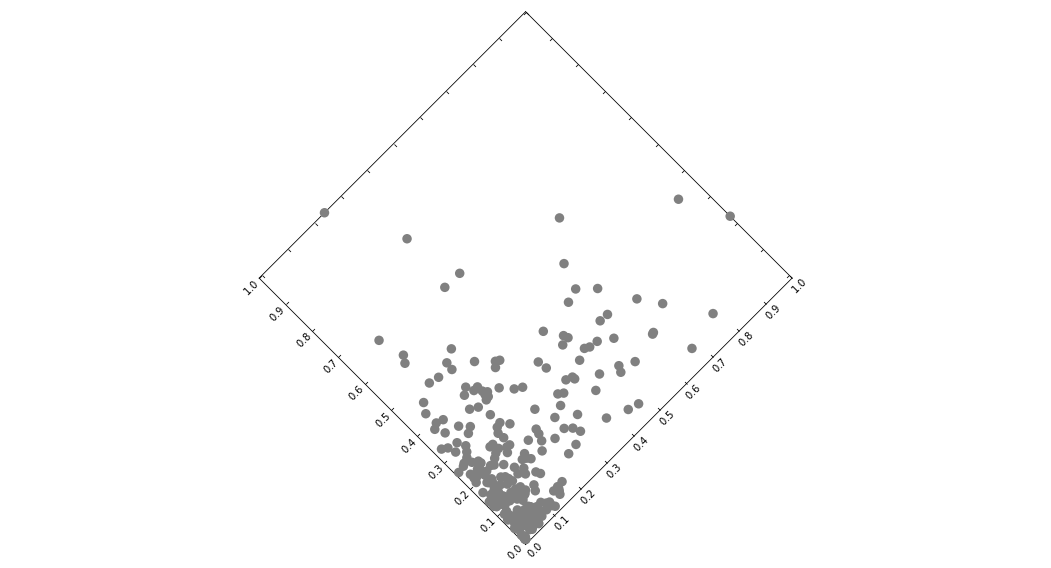

In [91]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.pyplot as plt


def setup_axes1(fig, rect):
    """
    A simple one.
    """
    tr = Affine2D().scale(9, 9).rotate_deg(45)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(-0.01, 1, -0.01, 1))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    aux_ax = ax1.get_aux_axes(tr)

    grid_helper.grid_finder.grid_locator1._nbins = 11
    grid_helper.grid_finder.grid_locator2._nbins = 11

    return ax1, aux_ax


##########################################################
fig = plt.figure(2, figsize=(48, 10))
fig.subplots_adjust(wspace=1, left=0.5, right=2)

ax1, aux_ax1 = setup_axes1(fig, 131)
aux_ax1.scatter(X_norm[301], X_norm[302], s=90, facecolors='grey', edgecolors='none', zorder=3)
plt.show()

In [65]:
players = df['player'].tolist()

In [66]:
# Drop columns
df1 = df.drop(['position', 'player', 'team', 'foot', 'mins_played', 'nineties'], axis=1)

In [69]:
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()  # could also test using the StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [70]:
X_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303
0,0.067167,0.722826,0.466667,0.727273,0.627907,0.689655,0.842105,0.0,0.6,0.058175,0.067854,0.028754,0.000000,0.134420,0.180861,0.043478,0.083333,0.1875,0.187500,0.187500,0.059322,0.058824,0.26,0.000000,0.193548,0.170213,0.285714,0.000000,0.062992,0.182648,0.166667,0.000000,0.048387,0.006369,0.006369,0.0,0.0,0.000000,0.0,0.0,0.002614,0.000000,0.058288,0.068493,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.660377,0.428571,0.190476,0.222222,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.538462,0.571429,0.000000,0.0,1.00,0.25,0.6,0.625,0.375,0.333333,0.5,1.0,0.2,0.2,0.666667,0.500000,0.615385,0.0,0.333333,0.4,0.444444,0.1,1.000000,0.153846,0.4,0.0,0.0,0.285714,0.578947,0.000000,0.000,0.0,0.0,1.0,0.285714,0.1,0.307692,0.0,0.0,0.0,0.0,0.4,0.0,1.0,0.0,0.900000,0.148649,0.333333,0.000000,0.1,0.0,0.0,0.276596,0.250000,0.0,0.0,0.0,0.777778,0.36,0.677419,0.666667,0.727273,0.5,0.2,0.05,0.333333,0.210526,0.0,0.0,0.0,0.0,0.0,0.0,0.157895,0.014085,0.022026,0.0,0.000000,0.025,0.208333,0.500000,0.042254,0.000000,0.000000,0.000000,0.0,0.214286,0.500,0.0000,0.000000,0.0,0.122677,0.098160,0.857143,0.003215,0.003521,0.0,0.0,0.0,0.258065,0.045283,0.083333,0.009756,0.060,0.000000,0.166667,0.000000,0.000000,0.000000,0.137681,0.229773,0.000000,0.000000,0.057971,0.008929,0.000000,0.010101,0.010127,0.059701,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.271186,0.260870,0.625,0.065319,0.016234,0.000000,0.004950,0.000000,0.385965,0.42,0.142857,0.25,0.011299,0.005525,0.039735,0.125,0.000000,0.0,0.0,0.0,0.000000,0.136364,0.111111,0.0000,0.000000,0.142857,0.142857,0.258621,0.000000,0.055556,0.048387,0.173913,0.578947,0.928571,0.271186,0.038513,0.274096,0.077011,0.087850,0.230667,0.223906,0.0,0.0,0.666667,0.000000,0.00,0.307692,0.021277,0.115385,0.444444,0.127451,0.127451,0.078571,0.000000,0.0,0.0,0.285714,0.166667,0.121212,0.933333,0.7750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071238,0.084139,0.052632,0.0,0.0,0.125000,0.166667,0.125000,0.0,0.572581,0.0,0.0,0.0,0.000000,0.765432,0.217391,0.948481,0.874274,0.932010,0.183778,0.294575,0.169163,0.938569,0.000000,0.160878,0.158747,0.847627,0.845365,0.0,0.225188,0.212947,0.230606,0.000121,0.261852,0.934224,0.354761,1.000000
1,0.463519,0.239130,0.466667,0.686869,0.837209,0.379310,0.526316,0.0,0.4,0.085500,0.102984,0.015974,0.014925,0.150034,0.220096,0.043478,0.000000,0.2500,0.187500,0.166667,0.118644,0.117647,0.38,0.000000,0.451613,0.404255,0.000000,0.333333,0.149606,0.182648,0.201389,0.000000,0.112903,0.019108,0.019108,0.0,0.0,0.000000,0.0,0.0,0.014379,0.032520,0.065574,0.112633,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.773585,0.000000,0.285714,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.571429,1.000000,0.0,0.25,0.25,0.4,0.375,0.375,0.333333,0.5,0.0,0.6,0.2,0.222222,0.416667,0.615385,1.0,0.000000,0.0,0.444444,0.4,0.333333,0.307692,0.4,0.0,